#1- Importing Required Libraries

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
import  warnings 
warnings.filterwarnings("ignore")

# 2-Importing data and taking a firt glance 


In [2]:
df=pd.read_csv("kc_house_data.csv") # ... reading data 

In [3]:
df.head(5) # ... showing the first five rows from the data 


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
print("shape of the data frame : {}".format(df.shape))# ... number of rows and  columns 
print("name of columns :  {}".format(df.columns)) # ... column names 

shape of the data frame : (21613, 21)
name of columns :  Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')


In [5]:
df.info() # ..... counting the number of non missing values in each column , col names and datatypes  
# result. ..we can see that we dont have missing values and we need to change datatypes for certain columns 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

Describtion of the data 

1-   id - Unique ID for each home sold
2-date - Date of the home sale
3-price - Price of each home sold
4-bedrooms - Number of bedrooms
5-bathrooms - Number of bathrooms, where .5 accounts for a room with a toilet but no shower
6-sqft_living - Square footage of the apartments interior living space
7-sqft_lot - Square footage of the land space
8-floors - Number of floors
9-waterfront - A dummy variable for whether the apartment was overlooking the waterfront or not 1’s represent a waterfront property, 0’s represent a non-waterfront property
10-view - An index from 0 to 4 of how good the view of the property was, 0 - lowest, 4 - highest
11-condition - An index from 1 to 5 on the condition of the apartment, 1 - lowest, 4 - highest
12-grade - An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design.
13-sqft_above - The square footage of the interior housing space that is above ground level
14-sqft_basement - The square footage of the interior housing space that is below ground level
15-yr_built - The year the house was initially built
16-yr_renovated - The year of the house’s last renovation
17-zipcode - What zipcode area the house is in
18-lat - Lattitude
19-long - Longitude
20-sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors
21-sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors


#2- Cleaning and Validate the dataset 

1-data types 

In [6]:
df["date"]= pd.to_datetime(df["date"]) # ... cahnging the date column from object to datetime 
df[["condition","grade","view","waterfront"]]=df[["condition","grade","view","waterfront"]].astype("category")#... they have a finite set of element
df["zipcode"]=df["zipcode"].astype("object")

In [7]:
df.dtypes # .... check that apply the change 

id                        int64
date             datetime64[ns]
price                   float64
bedrooms                  int64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                  float64
waterfront             category
view                   category
condition              category
grade                  category
sqft_above                int64
sqft_basement             int64
yr_built                  int64
yr_renovated              int64
zipcode                  object
lat                     float64
long                    float64
sqft_living15             int64
sqft_lot15                int64
dtype: object

2- Checking missing values 

In [8]:
df.isnull().sum()#.... to check missing values in each column 
# there is no missing values

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

3-duplicated values 

In [9]:
dup =df.duplicated(subset= ["id"] ,keep=False)#...creating false /true series to see duplicated values 
dup_df=df[dup] #.. converting the series to df 
dup_df#. ..There are duplicated values to be investigated


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
93,6021501535,2014-07-25,430000.0,3,1.50,1580,5000,1.0,0,0,...,8,1290,290,1939,0,98117,47.6870,-122.386,1570,4500
94,6021501535,2014-12-23,700000.0,3,1.50,1580,5000,1.0,0,0,...,8,1290,290,1939,0,98117,47.6870,-122.386,1570,4500
313,4139480200,2014-06-18,1384000.0,4,3.25,4290,12103,1.0,0,3,...,11,2690,1600,1997,0,98006,47.5503,-122.102,3860,11244
314,4139480200,2014-12-09,1400000.0,4,3.25,4290,12103,1.0,0,3,...,11,2690,1600,1997,0,98006,47.5503,-122.102,3860,11244
324,7520000520,2014-09-05,232000.0,2,1.00,1240,12092,1.0,0,0,...,6,960,280,1922,1984,98146,47.4957,-122.352,1820,7460
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20670,8564860270,2015-03-30,502000.0,4,2.50,2680,5539,2.0,0,0,...,8,2680,0,2013,0,98045,47.4759,-121.734,2680,5992
20779,6300000226,2014-06-26,240000.0,4,1.00,1200,2171,1.5,0,0,...,7,1200,0,1933,0,98133,47.7076,-122.342,1130,1598
20780,6300000226,2015-05-04,380000.0,4,1.00,1200,2171,1.5,0,0,...,7,1200,0,1933,0,98133,47.7076,-122.342,1130,1598
21580,7853420110,2014-10-03,594866.0,3,3.00,2780,6000,2.0,0,0,...,9,2780,0,2013,0,98065,47.5184,-121.886,2850,6000


In [10]:
# There are some houses that are sold twice in different date or price 
print( "# of houses that are sold twice are {} ".format(dup_df.id.unique().shape))
dup_df[["id","price", "date"]]#...columns changes 
dup_df_price_id=dup_df[dup_df.duplicated(subset=["id","price"],keep=False)].sort_values("price")
#... checking the houses that are sold twice with no price change
dup_df_price_id
#...checking if we need to delete them 
df=df.drop_duplicates(subset=["id","price"]) #..deleting the duplicated values (3 rows)
#df

# of houses that are sold twice are (176,) 


4- validate the date 

In [11]:
# By understanding the data, the sqft_above + sqft_basement = sqft_living 
# schecking if that applies on all values 
sum = df[["sqft_above" , "sqft_basement"]].sum(axis=1)#...calculating the sum from the two columns
mask=sum==df["sqft_living"]#...creating a series that has True if the condition is true 
df[~mask]#..... Filtering our data Frame to see the False result ( did not meet the condition) by using ~ 
#There is no row that doesnt meet the condition so we can trust our data more  

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15


5- checking inconsistency in categorical/discrete columns by using .value_counts() and bar plot

  a-bedrooms

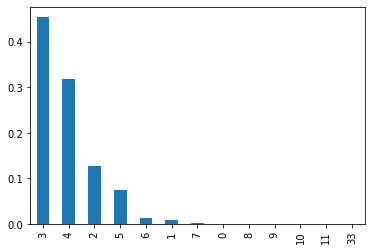

In [12]:
df["bedrooms"].value_counts(sorted).plot(kind="bar")#... we can see that 33 is so far from other dataset 
# but first lets try to understand if this is possible or not depending on the other factor 

In [13]:
df_bedroom_33=df[df["bedrooms"]==33]
df_bedroom_33
# we can see that this column doesnt make any sense so we will delete it 
df=df.drop(df_bedroom_33.index)#.. drop the index
df.bedrooms.value_counts()#..to check if the column has been deleted

3     9822
4     6881
2     2760
5     1601
6      272
1      199
7       38
0       13
8       13
9        6
10       3
11       1
Name: bedrooms, dtype: int64

In [14]:
df_bedroom_0=df[df["bedrooms"]==0]
df_bedroom_0# ... we cant have houses with 0 bedrooms

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
875,6306400140,2014-06-12,1095000.0,0,0.00,3064,4764,3.5,0,2,...,7,3064,0,1990,0,98102,47.6362,-122.322,2360,4000
3119,3918400017,2015-02-05,380000.0,0,0.00,1470,979,3.0,0,2,...,8,1470,0,2006,0,98133,47.7145,-122.356,1470,1399
3467,1453602309,2014-08-05,288000.0,0,1.50,1430,1650,3.0,0,0,...,7,1430,0,1999,0,98125,47.7222,-122.290,1430,1650
4868,6896300380,2014-10-02,228000.0,0,1.00,390,5900,1.0,0,0,...,4,390,0,1953,0,98118,47.5260,-122.261,2170,6000
6994,2954400190,2014-06-24,1295650.0,0,0.00,4810,28008,2.0,0,0,...,12,4810,0,1990,0,98053,47.6642,-122.069,4740,35061
8477,2569500210,2014-11-17,339950.0,0,2.50,2290,8319,2.0,0,0,...,8,2290,0,1985,0,98042,47.3473,-122.151,2500,8751
8484,2310060040,2014-09-25,240000.0,0,2.50,1810,5669,2.0,0,0,...,7,1810,0,2003,0,98038,47.3493,-122.053,1810,5685
9773,3374500520,2015-04-29,355000.0,0,0.00,2460,8049,2.0,0,0,...,8,2460,0,1990,0,98031,47.4095,-122.168,2520,8050
9854,7849202190,2014-12-23,235000.0,0,0.00,1470,4800,2.0,0,0,...,7,1470,0,1996,0,98065,47.5265,-121.828,1060,7200
12653,7849202299,2015-02-18,320000.0,0,2.50,1490,7111,2.0,0,0,...,7,1490,0,1999,0,98065,47.5261,-121.826,1500,4675


Text(0.5, 1.0, '#of bed rooms')

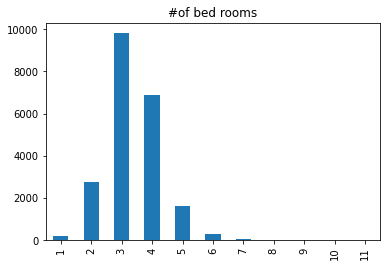

In [15]:
(len(df_bedroom_0)/len(df))*100 # ...we see only we have 0.06% so we can delete them 
df=df.drop(df_bedroom_0.index)
df["bedrooms"].value_counts().sort_index().plot(kind="bar")
plt.title("#of bed rooms")

b-waterfront and view

In [16]:
df["waterfront"].value_counts(normalize=True) 
# only 0 and 1 ... bun we can conclude that nearly 99% from our houses don't have waterfront 

0    0.992452
1    0.007548
Name: waterfront, dtype: float64

In [17]:
df["view"].value_counts(normalize=True) 
# like discribtion .. only wwe have from one to four rank but we can see that nearly 90% has very poor view 

0    0.901787
2    0.044499
3    0.023569
1    0.015373
4    0.014771
Name: view, dtype: float64

3-condition and grade 

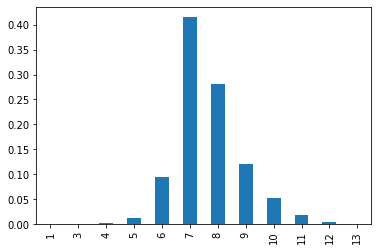

In [18]:
df["grade"].value_counts(normalize=True).sort_index().plot(kind="bar")
#we can see that grade is on the rangefor (1-13) .Also , we can see that most building has  an average level of construction and design

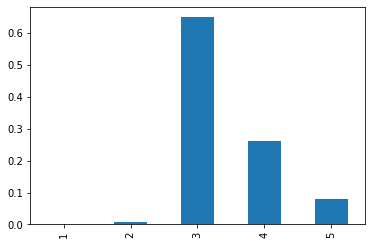

In [19]:
df["condition"].value_counts(normalize=True).sort_index().plot(kind="bar")
# we can see that grade is on the rangefor (1-5) .Also , nearly more than 90%  houses have  a good/grat condition 

In [20]:
df_bad_condtion=df[df["condition"].isin([1,2])]#...maybe we use it in our anlaysis later 

#3-Primary Data Analysis /feature extraction 


In [21]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
count,2.159600e+04,2.159600e+04,21596.000000,21596.000000,21596.000000,2.159600e+04,21596.000000,21596.000000,21596.000000,21596.000000,21596.000000,21596.000000,21596.000000,21596.000000,21596.000000
mean,4.580230e+09,5.401589e+05,3.371504,2.115531,2080.126459,1.510327e+04,1.493980,1788.431006,291.695453,1970.996990,84.377014,47.560072,-122.213943,1986.518753,12761.382617
std,2.876721e+09,3.671596e+05,0.904529,0.769389,918.271828,4.141392e+04,0.539683,827.861770,442.677976,29.373431,401.623647,0.138567,0.140781,685.278276,27275.803639
min,1.000102e+06,7.500000e+04,1.000000,0.000000,370.000000,5.200000e+02,1.000000,370.000000,0.000000,1900.000000,0.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1426.500000,5.040000e+03,1.000000,1190.000000,0.000000,1951.000000,0.000000,47.471075,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.620000e+03,1.500000,1560.000000,0.000000,1975.000000,0.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.069050e+04,2.000000,2210.000000,560.000000,1997.000000,0.000000,47.678000,-122.125000,2360.000000,10083.250000
max,9.900000e+09,7.700000e+06,11.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,4820.000000,2015.000000,2015.000000,47.777600,-121.315000,6210.000000,871200.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff9323113a0>,
      dtype=object)

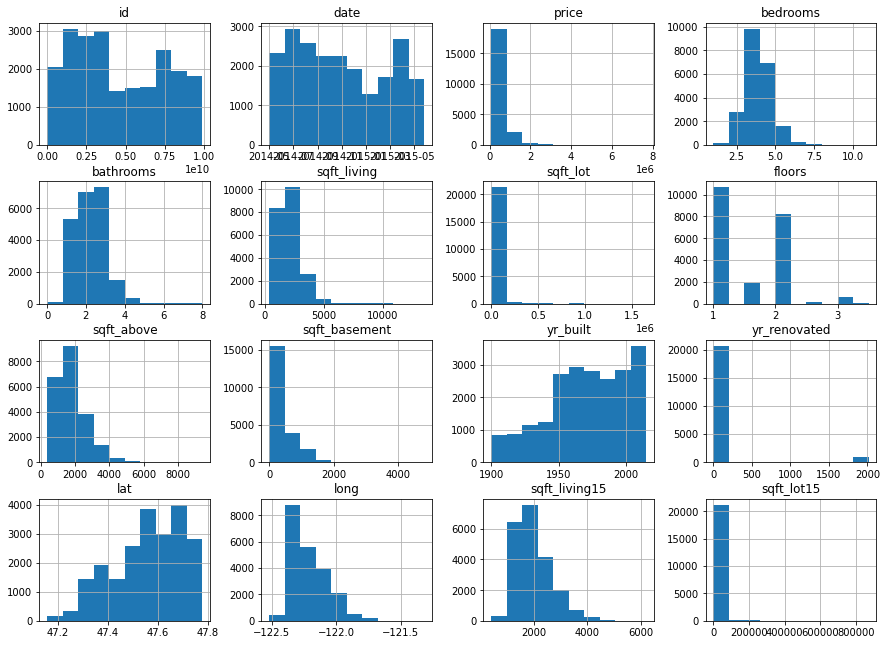

In [22]:
df.hist(figsize=(15,11))

In [23]:
# from the hist we can get an overall insights : 
"""
1- price dist has highly right skeweness (all the price tend to be low) but maybe because there is outliers that affect the shape of
the dist so we will look at outliers later
2- if we look at lat and long we can see our data approximatly located at northwest 
3- sqft _living15 is nearly equal to the sqft_liv and also the dist is right (maybe bec outliers or need some transformation).so we can 
delete one of them (duplicate info) we can check corr later. 
#4 sqft_lot15 is nearly equal to the sqft_lot15 and also the dist is right (maybe bec outliers or need some transformation)..so we can 
delete one of them (duplicate info) we can check corr later . 
#5 we are dealing with approximatly mean 3 bedrooms and 2 floors houses
"""

'\n1- price dist has highly right skeweness (all the price tend to be low) but maybe because there is outliers that affect the shape of\nthe dist so we will look at outliers later\n2- if we look at lat and long we can see our data approximatly located at northwest \n3- sqft _living15 is nearly equal to the sqft_liv and also the dist is right (maybe bec outliers or need some transformation).so we can \ndelete one of them (duplicate info) we can check corr later. \n#4 sqft_lot15 is nearly equal to the sqft_lot15 and also the dist is right (maybe bec outliers or need some transformation)..so we can \ndelete one of them (duplicate info) we can check corr later . \n#5 we are dealing with approximatly mean 3 bedrooms and 2 floors houses\n'

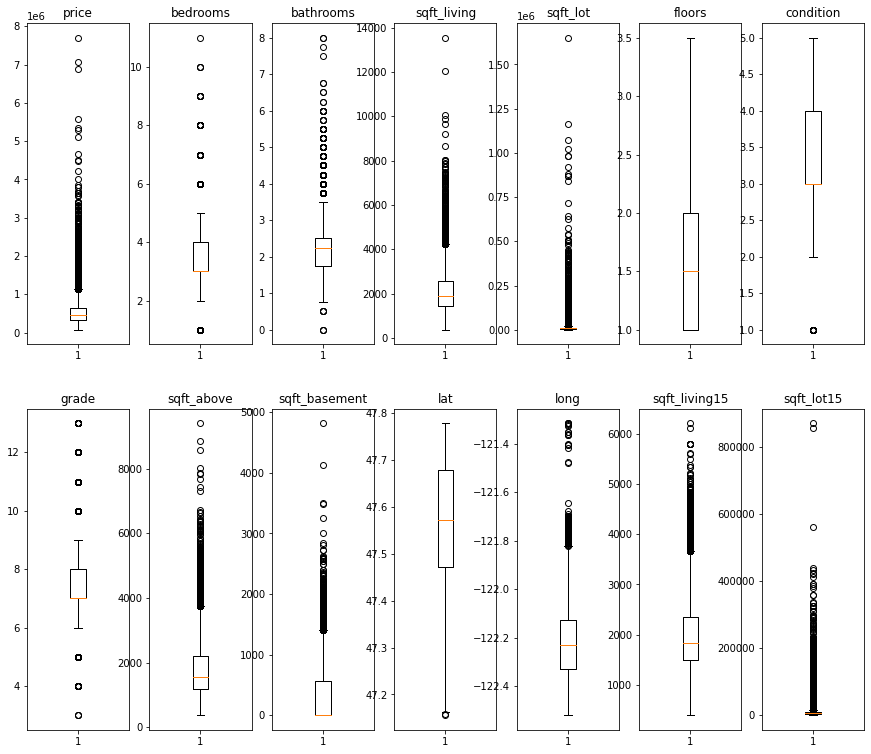

In [24]:
fig,ax=plt.subplots(2,7,figsize=(15,13))
def box (num1 , num2 , title ) :
  ax[num1,num2].boxplot(df[title])
  ax[num1,num2].set_title(title)
box(0,0,"price")
box(0,1,"bedrooms")
box(0,2,"bathrooms")
box(0,3,"sqft_living")
box(0,4,"sqft_lot")
box(0,5,"floors")
box(0,6,"condition")
box(1,0,"grade")
box(1,1,"sqft_above")
box(1,2,"sqft_basement")
box(1,3,"lat")
box(1,4,"long")
box(1,5,"sqft_living15")
box(1,6,"sqft_lot15")


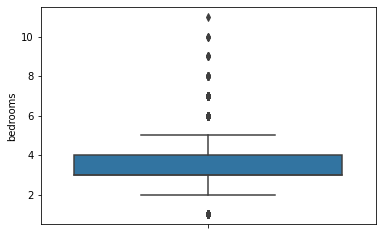

In [25]:
sns.boxplot(y=df["bedrooms"])

In [26]:
# we can see theres a lot of outliers 
# first lets invistigate how much percentage do we have 
df_num=df.select_dtypes(include=["int" ,"float"])
import numpy as np 
def outliers (col_name) : 
  """ filtering the outliers using inter quantile range methid """
  Q1=np.quantile(df_num[col_name],0.25)
  Q3=np.quantile(df_num[col_name],0.75)
  IQR=Q3-Q1
  upper_limit=Q3+1.5*IQR
  lower_limit=Q1-1.5*IQR
  return (df_num[col_name] > upper_limit) | (df_num[col_name]<lower_limit)

print(df_num)

               id     price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0      7129300520  221900.0         3       1.00         1180      5650   
1      6414100192  538000.0         3       2.25         2570      7242   
2      5631500400  180000.0         2       1.00          770     10000   
3      2487200875  604000.0         4       3.00         1960      5000   
4      1954400510  510000.0         3       2.00         1680      8080   
...           ...       ...       ...        ...          ...       ...   
21608   263000018  360000.0         3       2.50         1530      1131   
21609  6600060120  400000.0         4       2.50         2310      5813   
21610  1523300141  402101.0         2       0.75         1020      1350   
21611   291310100  400000.0         3       2.50         1600      2388   
21612  1523300157  325000.0         2       0.75         1020      1076   

       floors  sqft_above  sqft_basement  yr_built  yr_renovated      lat  \
0         1.0        1

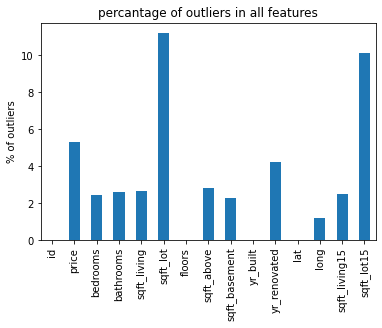

In [27]:
# we can see alot of column have an outliers and there is column more than 10 % 
# let"s invistigate why before doing any drop or impution process ? 
x={}
for col in df_num.columns : 
  #print("% of outliers in {} column is {:.3f}".format( col,(outliers(col).mean())*100))
  x[col]=outliers(col).mean()*100
  pd.Series(x).plot(kind="bar" , ylabel="% of outliers" ,title="percantage of outliers in all features")

id              -0.001742
price            0.306853
bedrooms        -0.011399
bathrooms        0.024524
sqft_living      0.052280
sqft_lot        -0.085557
floors           0.049324
sqft_above      -0.001056
sqft_basement    0.110423
yr_built        -0.148294
yr_renovated     0.029246
lat              1.000000
long            -0.135495
sqft_living15    0.048814
sqft_lot15      -0.086226
Name: lat, dtype: float64

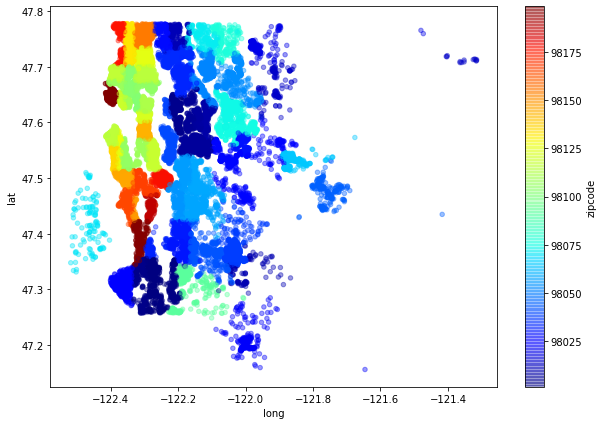

In [28]:
#1- features that related to the location (lat ,long ,zip) .. we can replace them by the city name 
df.plot(kind="scatter", x="long", y="lat", alpha=0.4,
              figsize=(10,7),
             c="zipcode", cmap=plt.get_cmap("jet"), colorbar=True,
             sharex=False)
df.corr()["lat"]

In [29]:
#converting zip code to city name by using : 
!pip install uszipcode

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 KB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.5/121.5 KB 8.8 MB/s eta 0:00:00


In [30]:
#converting zip code to city name 
from uszipcode import SearchEngine, SimpleZipcode
search = SearchEngine()
def zco(x):
    city = search.by_zipcode(x).major_city
    return city if city else 'None'

df['city'] = df['zipcode'].apply(zco)
df

Download /root/.uszipcode/simple_db.sqlite from https://github.com/MacHu-GWU/uszipcode-project/releases/download/1.0.1.db/simple_db.sqlite ...
  1.00 MB downloaded ...
  2.00 MB downloaded ...
  3.00 MB downloaded ...
  4.00 MB downloaded ...
  5.00 MB downloaded ...
  6.00 MB downloaded ...
  7.00 MB downloaded ...
  8.00 MB downloaded ...
  9.00 MB downloaded ...
  10.00 MB downloaded ...
  11.00 MB downloaded ...
  Complete!


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,city
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,Seattle
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,Seattle
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,Kenmore
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,Seattle
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,Sammamish
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,2014-05-21,360000.0,3,2.50,1530,1131,3.0,0,0,...,1530,0,2009,0,98103,47.6993,-122.346,1530,1509,Seattle
21609,6600060120,2015-02-23,400000.0,4,2.50,2310,5813,2.0,0,0,...,2310,0,2014,0,98146,47.5107,-122.362,1830,7200,Seattle
21610,1523300141,2014-06-23,402101.0,2,0.75,1020,1350,2.0,0,0,...,1020,0,2009,0,98144,47.5944,-122.299,1020,2007,Seattle
21611,291310100,2015-01-16,400000.0,3,2.50,1600,2388,2.0,0,0,...,1600,0,2004,0,98027,47.5345,-122.069,1410,1287,Issaquah


In [31]:
#(is renovated) column is more useful than (yr_renovated) 
df["is_renovated"] =0 
df.loc[df['yr_renovated'].astype("int") > 0, 'is_renovated'] = 1


In [32]:
df["year"]=df["date"].dt.year #..changing the data type of year column to simplify the analysis
df["month"]=df["date"].dt.month#..changing the data type of month column to simplify the analysis
#df.loc[df["yr_renovated"]>0 , "yr_built"]=df["yr_renovated"]#. .change year built to year renovated 

CatPlots

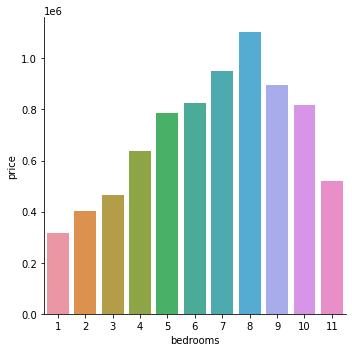

In [33]:
sns.catplot(x="bedrooms",y="price",data=df,kind="bar",ci=None) #

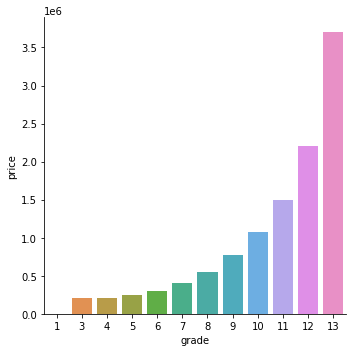

In [34]:
sns.catplot(x="grade",y="price",data=df,kind="bar",ci=None) # exponential realtionship 

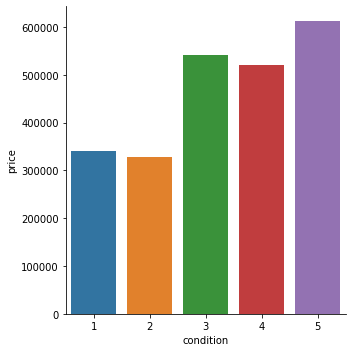

In [35]:
sns.catplot(x="condition",y="price",data=df,kind="bar",ci=None) # there is realtion but nonlinaer

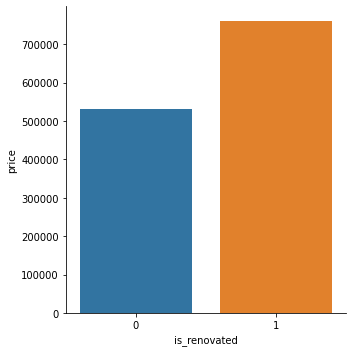

In [36]:
sns.catplot(x="is_renovated",y="price",data=df,kind="bar",ci=None) # the mean price of the renovated is much higher than the houses is not renovated

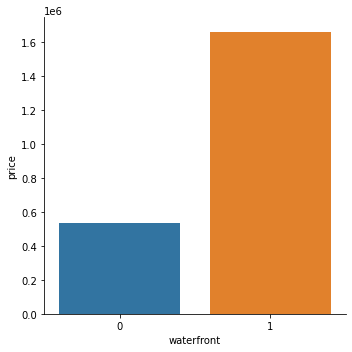

In [37]:
sns.catplot(x="waterfront",y="price",data=df,kind="bar",ci=None)# the price of waterfront is so much higher 

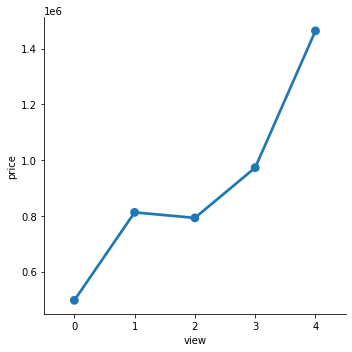

In [38]:
sns.catplot(x="view",y="price",data=df,kind="point",ci=None) #there is ralation 

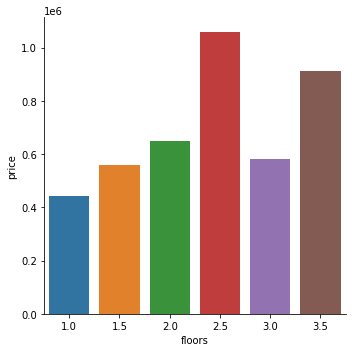

In [39]:
sns.catplot(x="floors",y="price",data=df,kind="bar",ci=None) # there is diff between the price of  floors  but it doesnt linear 

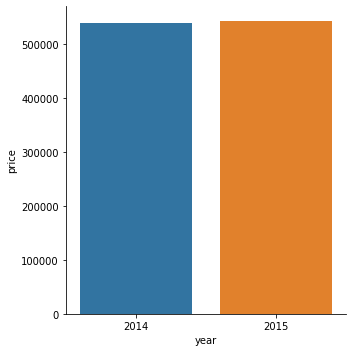

In [40]:
sns.catplot(x="year",y="price",data=df,kind="bar",ci=None) # the year of purchase doesnt affect the price

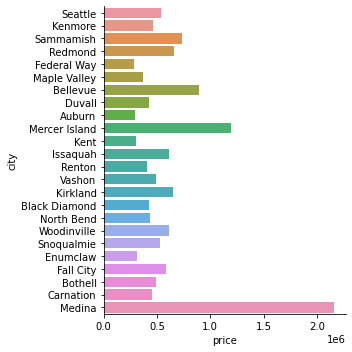

In [41]:
sns.catplot(x="price",y="city",data=df,kind="bar",ci=None) # it diff from city to city 

Numerical Plots 

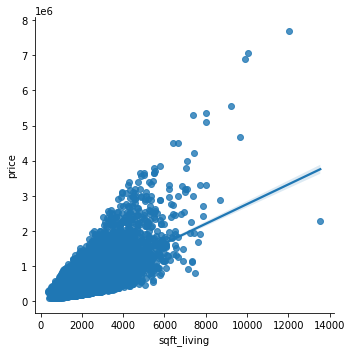

In [42]:
sns.lmplot(x="sqft_living",y="price",data=df) # we can see there is a linear relation 

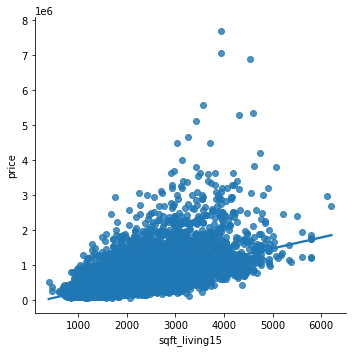

In [43]:
sns.lmplot(x="sqft_living15",y="price",data=df) # we can see there is a linear relation 

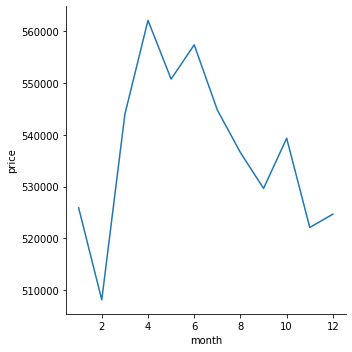

In [44]:
sns.relplot(x="month",y="price",data=df,kind="line",ci=None) # higher price in spring and summer 

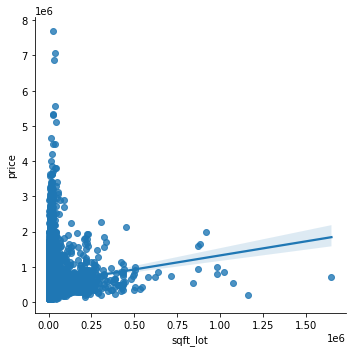

In [45]:
sns.lmplot(x="sqft_lot",y="price",data=df) 

In [46]:
#df["sqft_lot15_log"]=np.log(df["sqft_lot15"])
#sns.lmplot(x="sqft_lot15_log",y="price_log",data=df)

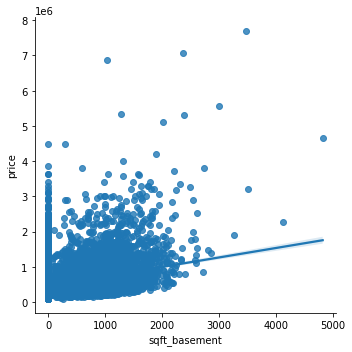

In [47]:
sns.lmplot(x="sqft_basement",y="price",data=df)

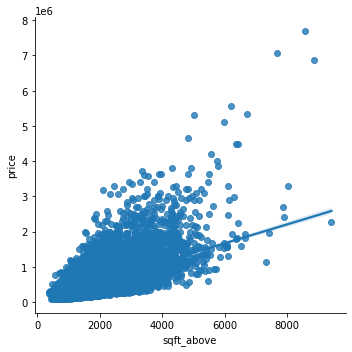

In [48]:
sns.lmplot(x="sqft_above",y="price",data=df)

#feature selection

In [49]:
# based on understanding our data and feature engineering, dropping non-sense columns
df[["yr_built","is_renovated" ,"year" ,"month"]]=df[["yr_built","is_renovated" ,"year" ,"month"]].astype("category")
#yr_untill_purchase= yr_purshase(2014/2015) - yr_build 1980
df_before_dummies=df


In [50]:
#one hot encoder for backward elimination and modeling 
df_city=pd.get_dummies(df["city"],drop_first=True)
df_dummies=pd.concat([df,df_city] ,axis=1)
df_dummies=df_dummies.drop("city",1)
df_lat=df_dummies
df_dummies=df_dummies.drop(["id","zipcode","lat","long","yr_renovated","date"],axis=1) 


#BACK WORD ELIMINATION 1

In [51]:
# x ,y 
x=df_dummies.drop("price" ,axis=1)
y=df_dummies["price"]
x=x.values # converted to 2d array
y=y.values # converted to 1d array 
y.shape
x.shape

(21596, 40)

In [52]:
x=np.append(arr=np.ones((21596,1)).astype("int"),values=x,axis=1) # adding one to the first column of the array 
# b0 in  statsmodels is not defined 
x.shape

(21596, 41)

In [53]:
#significance level is 0.05 
#backword elimination for feature selection 
import  statsmodels.api as sm 
x_opt=x[: , [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40]]

ols_reg =sm.OLS(endog=y ,exog=x_opt).fit()
print(ols_reg.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.739
Model:                            OLS   Adj. R-squared:                  0.739
Method:                 Least Squares   F-statistic:                     1566.
Date:                Tue, 17 Jan 2023   Prob (F-statistic):               0.00
Time:                        10:32:03   Log-Likelihood:            -2.9285e+05
No. Observations:               21596   AIC:                         5.858e+05
Df Residuals:                   21556   BIC:                         5.861e+05
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -7.39e+07   8.88e+06     -8.327      0.0

In [54]:
# deleteindex number 39 because p values higher than 0.5 (our segnificance level )
x_opt=x[: , [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,40]]

ols_reg =sm.OLS(endog=y ,exog=x_opt).fit()
print(ols_reg.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.739
Model:                            OLS   Adj. R-squared:                  0.739
Method:                 Least Squares   F-statistic:                     1608.
Date:                Tue, 17 Jan 2023   Prob (F-statistic):               0.00
Time:                        10:32:03   Log-Likelihood:            -2.9285e+05
No. Observations:               21596   AIC:                         5.858e+05
Df Residuals:                   21557   BIC:                         5.861e+05
Df Model:                          38                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -7.385e+07   8.87e+06     -8.321      0.0

In [55]:
#deleting 23 index because p values higher than 0.5 (our segnificance level )
x_opt=x[: , [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,40]]

ols_reg =sm.OLS(endog=y ,exog=x_opt).fit()
print(ols_reg.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.739
Model:                            OLS   Adj. R-squared:                  0.739
Method:                 Least Squares   F-statistic:                     1651.
Date:                Tue, 17 Jan 2023   Prob (F-statistic):               0.00
Time:                        10:32:04   Log-Likelihood:            -2.9285e+05
No. Observations:               21596   AIC:                         5.858e+05
Df Residuals:                   21558   BIC:                         5.861e+05
Df Model:                          37                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -7.393e+07   8.87e+06     -8.332      0.0

In [56]:
#deleting 27 index because p values higher than 0.5 (our segnificance level )
x_opt=x[: , [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,24,25,26,27,29,30,31,32,33,34,35,36,37,38,40]]

ols_reg =sm.OLS(endog=y ,exog=x_opt).fit()
print(ols_reg.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.739
Model:                            OLS   Adj. R-squared:                  0.739
Method:                 Least Squares   F-statistic:                     1697.
Date:                Tue, 17 Jan 2023   Prob (F-statistic):               0.00
Time:                        10:32:04   Log-Likelihood:            -2.9285e+05
No. Observations:               21596   AIC:                         5.858e+05
Df Residuals:                   21559   BIC:                         5.861e+05
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -7.402e+07   8.87e+06     -8.342      0.0

In [57]:
df_after_extract_features=df_dummies.drop("price" ,axis=1) # dropping the column of target to only take features 
df_after_extract_features=df_after_extract_features.iloc[: , [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,23,24,25,26,28,29,30,31,32,33,34,35,36,37,39]] #subsetting the index we got from the backword elimination 
df_after_extract_features.columns # print columns name 

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'sqft_living15', 'sqft_lot15',
       'is_renovated', 'year', 'month', 'Bellevue', 'Black Diamond', 'Bothell',
       'Carnation', 'Duvall', 'Fall City', 'Federal Way', 'Issaquah',
       'Kenmore', 'Kirkland', 'Maple Valley', 'Medina', 'Mercer Island',
       'North Bend', 'Redmond', 'Renton', 'Sammamish', 'Seattle', 'Snoqualmie',
       'Woodinville'],
      dtype='object')

In [58]:
y=df_dummies["price"]# our target Series 
df_new=pd.concat([df_after_extract_features ,y] ,axis=1) # features dataFrame that resulted from the backword elimination 
df_new[["waterfront","view","condition","grade","is_renovated","year","month"]]=df_new[["waterfront","view","condition","grade","is_renovated","year","month"]].astype(int) #converting data type to int 

Bckword_Elimination 2 

In [59]:
# making a second data Frame which containing latitude and longitude, named df_lat 
df_lat=df_lat.drop(["id","date","zipcode","yr_renovated"],axis=1) # creating df_lat 
X=df_lat.drop("price" ,axis=1) # features variable 
y=df_lat["price"] # target variable 
X=X.values # converted to 2d array
y=y.values # converted to 1d array 
y.shape # shape of array for target variable 
X.shape # shape of array for features 

(21596, 42)

In [60]:
X=np.append(arr=np.ones((21596,1)).astype("int"),values=X,axis=1) # adding one to the first column of the array 
# because b0 in  statsmodels doesnt defined 
X.shape

(21596, 43)

In [61]:
import  statsmodels.api as sm 
X_opt=X[: , [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42]]  

ols_reg =sm.OLS(endog=y ,exog=x_opt).fit() # fit model for starting backword elimination 
print(ols_reg.summary()) # print summary  

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.739
Model:                            OLS   Adj. R-squared:                  0.739
Method:                 Least Squares   F-statistic:                     1697.
Date:                Tue, 17 Jan 2023   Prob (F-statistic):               0.00
Time:                        10:32:05   Log-Likelihood:            -2.9285e+05
No. Observations:               21596   AIC:                         5.858e+05
Df Residuals:                   21559   BIC:                         5.861e+05
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -7.402e+07   8.87e+06     -8.342      0.0

In [62]:
df_lat=df_lat.drop("Carnation",axis=1) # df_

#models

In [ ]:
from pandas.core import algorithms 
from sklearn.linear_model import LinearRegression ,Lasso
from sklearn.model_selection import train_test_split ,cross_val_score , KFold,GridSearchCV ,RandomizedSearchCV ,learning_curve
from sklearn.preprocessing import StandardScaler 
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor ,GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import RFE


class Regresssion_models() : # creating a class for random forest and gradient boosting algorithms, which contains functions that help automating any data to choose the best model
  def __init__(self,data,target,algorithim): 
    """ variables related to the entire class """
    self.data=data
    self.target=target
    self.algorithim=algorithim
  
  
  def model(self) :
    """ splitting data, features from target variables. And splitting data to train and test to get reliable results """
    X=self.data.drop(self.target ,axis=1)
    y=self.data[self.target]
    X_train,X_test ,y_train ,y_test = train_test_split(X,y,test_size=0.2 ,random_state=0)
    return(X_train ,X_test ,y_train ,y_test)

  def train(self):
    """ trainig the model to get the coefficients"""
    mdl=self.algorithim
    return mdl.fit(self.model()[0],self.model()[2])

  def accuracy(self,number_of_fold=5):
    """ Calculate the accuracy for cross validation of data, training, and testing the data"""
    kf=KFold(number_of_fold ,shuffle=True,random_state=0)
    cv_score=np.mean(cross_val_score(self.algorithim,self.model()[0],self.model()[2],cv=kf))
    train_score=self.train().score(self.model()[0],self.model()[2])
    test_score=self.train().score(self.model()[1],self.model()[3])
    return (f"validation_score:{cv_score},train_score:{train_score} ,test_score :{test_score}")

  def enhance_rf_model(self,n_estimators=100 ,max_depth=8 , min_sample_leaf=3,number_of_fold=5) : 
    """ Hyperparameter tuning for the random forest model, to get best hyperparameter"""
    grid={"n_estimators":n_estimators, "max_depth":max_depth, "min_samples_leaf" : min_sample_leaf}
    CV=RandomizedSearchCV(self.algorithim,grid,cv=number_of_fold,n_jobs=-1,n_iter=25) 
    CV.fit(self.model()[0],self.model()[2])
    return CV.best_params_

  def enhance_boost_model(self,n_estimators=100,number_of_fold=5) : 
    """ Hyperparameter tuning for the gradient boosting model, to get best trees number (n_estimators) at a certain learning rate which is 0.2"""
    grid={"n_estimators":n_estimators}
    CV=GridSearchCV(self.algorithim,grid,cv=number_of_fold,n_jobs=-1) 
    CV.fit(self.model()[0],self.model()[2])     
    for mean, std, params in zip(CV.cv_results_['mean_test_score'], CV.cv_results_['std_test_score'], CV.cv_results_['params']):
      print("%0.3f for %r"%(mean , params))

  def enhance_boost_model_second(self,learning_rate=0.2,n_estimators=190 ,max_depth=8 , min_sample_leaf=10,number_of_fold=5,subsample=0.8) : 
    """ Hyperparameter tuning for the gradient boosting model, to get best hyperparameter, related to the trees"""
    grid={"max_depth":max_depth ,"min_samples_leaf":min_sample_leaf}
    CV=RandomizedSearchCV(self.algorithim,grid,cv=number_of_fold,n_jobs=-1,n_iter=25) 
    CV.fit(self.model()[0],self.model()[2])     
    for mean, std, params in zip(CV.cv_results_['mean_test_score'], CV.cv_results_['std_test_score'], CV.cv_results_['params']):
      print("%0.3f  for %r"%(mean , params))
  

  def feature_selection(self) :
    """most important features, depending on random forest selestion"""
    importance_feature= pd.Series (self.train().feature_importances_ , index=self.data.drop(self.target ,axis=1).columns).sort_values() 
    importance_feature.plot(kind="bar") 
    plt.show( ) 

  def learn_curve(self,train_size ,number_of_fold=5) :
    """Creating learning curve to validate our data"""
    train_sizes, train_scores, test_scores = learning_curve(estimator=self.algorithim,X=self.data.drop(self.target ,axis=1),y=self.data[self.target],cv=number_of_fold, scoring="neg_root_mean_squared_error",train_sizes=train_size)
    train_mean= -train_scores.mean(axis=1)
    test_mean = -test_scores.mean(axis=1)
    plt.subplots(figsize=(10,8))
    plt.plot(train_sizes, train_mean, label="train")
    plt.plot(train_sizes, test_mean, label="validation")
    plt.title("Learning Curve")
    plt.xlabel("Training Set Size")
    plt.ylabel("RMSE")
    plt.legend(loc="best")

  def price_var(self) : 
    """Finding the residual which between the actual and perdition price to see how its distribution looks links. """
    y_pred = self.train().predict(self.model()[1])
    y_test=self.model()[3]
    residual=y_test-y_pred
    plt.figure(figsize=(10,8))
    return sns.distplot(residual) 

  def rmse(self) : 
    """Calculate the root mean square error"""
    y_pred = self.train().predict(self.model()[1])
    y_test=self.model()[3]
    return (f"root mean square error : {np.sqrt(mean_squared_error(y_test,y_pred))}")

#RandomForest 

for dataframe without latitude and longitude

In [ ]:
rf=Regresssion_models(data=df_new,target="price",algorithim=RandomForestRegressor(random_state=0)) #instantiate the class

In [ ]:
rf.accuracy() # calculating accuracies (cv, train, test) for first trial without tuning >> overfitting 

'validation_score:0.7972341864236837,train_score:0.9738847189187415 ,test_score :0.840171186657253'

In [ ]:
dict_=rf.enhance_rf_model(n_estimators=np.arange(100,250,50),max_depth=np.arange(3,10,1),min_sample_leaf=np.arange(5,20,1))#tuning hyperparameter

In [ ]:
rf=Regresssion_models(data=df_new,target="price",algorithim=RandomForestRegressor(**dict_)) #instantiate the class with new hyperparameter

In [ ]:
rf.accuracy() #..calculating accuracies (cv, train, test) for trial 2 >> reduced overfitting

In [ ]:
#rf=Regresssion_models(data=df_new,target="price",algorithim=RandomForestRegressor(random_state=0)) #instantiate the class

In [ ]:
rf.feature_selection() # getting most important features, depending on random forest selestion

In [ ]:
#rf.learn_curve(train_size=[1, 75, 150, 270, 331])

new trial of dataframe adding latitude and longitude (df_lat)

In [ ]:
rf=Regresssion_models(data=df_lat,target="price",algorithim=RandomForestRegressor(random_state=0))
# adding latitude and longitude in our consideration 

In [ ]:
rf.accuracy()# calculating accuracies (cv, train, test) for first trial without tuning >> overfitting 

In [ ]:
dict_=rf.enhance_rf_model(n_estimators=np.arange(100,250,50),max_depth=np.arange(3,10,1),min_sample_leaf=np.arange(5,20,1))#tuningtuning hyperparameter

In [ ]:
rf=Regresssion_models(data=df_lat,target="price",algorithim=RandomForestRegressor(**dict_))#instantiate the class with new hyperparameter


In [ ]:
rf.accuracy() #elimenating overfitting and the accuracy is good 

In [ ]:
rf.feature_selection() # the most important feature selection >> the lat and long take place 

In [ ]:
rf.learn_curve(train_size=[1, 75, 150, 270, 331]) # validation of the data using learning curve

# GradiantBoosting 

dataframe without latitude and longitude

In [ ]:
GB=Regresssion_models(df_new,"price",GradientBoostingRegressor())
GB.accuracy() #calculating accuracies (cv, train, test) for first trial without tuning >> overfitting 

new trial of dataframe adding latitude and longitude (df_lat)



In [ ]:
GB=Regresssion_models(df_lat,"price",GradientBoostingRegressor())
GB.accuracy()#calculating accuracies (cv, train, test) for first trial without tuning >> overfitting (higher than (df_new))

'validation_score:0.8592755396256108,train_score:0.9020358081119414 ,test_score :0.8903621821105341'

In [ ]:
GB=Regresssion_models(df_lat,"price",GradientBoostingRegressor(learning_rate=0.2)) #instantiate the class based on learning rate =0.2

In [ ]:
GB.enhance_boost_model(n_estimators=np.arange(50,200,10)) #hyperparameter tuning to find appropriate number of trees, at specific learning rate

In [ ]:
GB=Regresssion_models(df_lat,"price",GradientBoostingRegressor(learning_rate=0.2,n_estimators=190)) #instantiate the new class with the best number of trees
GB.accuracy() #calculating accuracies (cv, train, test) for second trial without hyperparameters related to the tree

In [ ]:
GB.enhance_boost_model_second(max_depth=np.arange(5,15,1) ,min_sample_leaf=np.arange(10,50,5)) #hyperparameter tuning

In [ ]:
GB=Regresssion_models(df_lat,"price",GradientBoostingRegressor(learning_rate=0.2,n_estimators=190,max_depth= 3,min_samples_leaf= 30)) #instantiate the class
GB.accuracy() #calculating accuracies (cv, train, test) for third trial  >> the best model


'validation_score:0.8787369203393073,train_score:0.9225414026860724 ,test_score :0.9004212617550983'

(<matplotlib.axes._subplots.AxesSubplot at 0x7f9744fa9490>, 118315.61423993083)

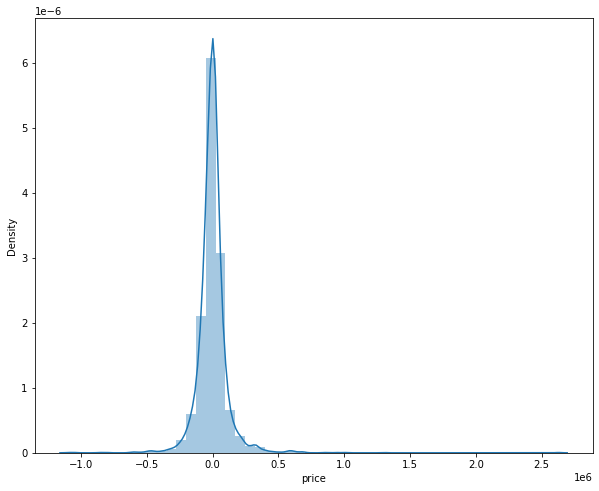

In [ ]:
GB.var()

In [ ]:
GB.mse()

'root mean square error : 118318.0381113266'

#Feature Selection 

In [ ]:
from seaborn.regression import algo
class feature_selection () :  #selecting the most important features using random forest and lasso
  def __init__ (self ,data, target): 
    """ variables related to the entire class """
    self.data =data 
    self.target =target 
  
  def Random_forest_method (self) : 
    """ most important features, depending on random forest selestion"""
    X=self.data.drop(self.target ,axis=1)
    y=self.data[self.target]
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25 ,random_state=0) 
    rf=RandomForestRegressor(n_estimators=100)
    rf.fit(X_train ,y_train)
    importance_feature= pd.Series ( rf.feature_importances_, index=X.columns).sort_values() 
    s=pd.Series(np.array(X.columns)[rf.feature_importances_ > 0.05])
    df_rf=pd.DataFrame(self.data.loc[:,s])
    plot=importance_feature.plot(kind="bar") 
    return df_rf,plot
  
  def Lasso(self ,k_fold=5) : 
    """ most important features, depending on lasso coefficients (ignoring the coefficient which shrinks to zero)"""
    X=self.data.drop(self.target ,axis=1)
    y=self.data[self.target]
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25 ,random_state=0) 
    pipeline = Pipeline([('scaler',StandardScaler(),"power"),
                     ('model',Lasso())])    
    search = GridSearchCV(pipeline,
                      {'model__alpha':np.arange(0.1,3,0.3)},
                      cv = k_fold, scoring="neg_mean_squared_error")
    search.fit(X_train,y_train)
    coefficients = search.best_estimator_.named_steps['model'].coef_
    importance = np.abs(coefficients)  
    importance_feature= pd.Series ( importance, index=X.columns).sort_values()
    s=pd.Series(np.array(X.columns)[importance > 0]) 
    df_lasso=pd.DataFrame(self.data.loc[:,s])
    plot=importance_feature.plot(kind="bar")
    return df_lasso ,plot


In [ ]:
mdl=feature_selection(df_lat,"price") #instantiate class

In [ ]:
df_rf,plot_rf=mdl.Random_forest_method() #selecting features depending on random forest, and printing the dataframe and plot
print(df_rf)

In [ ]:
df_lasso,plot_lasso=mdl.Lasso() #selecting features depending on lasso, and printing the dataframe and plot
print(df_rf)

#Saving the best trained model 

In [ ]:
#Training the best model
GB=GradientBoostingRegressor(learning_rate=0.2,n_estimators=190,max_depth= 3,min_samples_leaf= 30)
X=df_lat.drop("price",axis=1)
y=df_lat["price"]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25 ,random_state=0) 
GB.fit(X_train,y_train) 

In [ ]:
import pickle 
filename ="trained_model.sav"#naming the file we want to save it in
pickle.dump(GB,open(filename,"wb"))#saving the best model (GB)


In [ ]:
# loading the model 
load_model=pickle.load(open("/content/trained_model.sav","rb"))